# Titanic Tutorial

Chris Defreitas

17 October 2018

1. What is the purpose of this project?
2. Explain why we have Test and Train dataset. Give some quick stats on each.
3. Explain your first bar chart - what is it telling us?
4. Explain your first line chart - what is it telling us?
5. What is overfitting? Why do we care?
6. Explain the transformations.

The purpose of this project is:

#### Version History

ver / valid / kaggle / Description

v1 - 75%    -  75%            Basic decision tree model with label encoding


## Table of Contents

0. Download Dataset
1. Importing a DataFrame
2. Visualize the Data
3. Cleanup and Transform the Data
4. Encode the Data
5. Split Training and Test Sets
6. Use a Decision Tree Model
7. Upload to Kaggle

## 0. Download Dataset

* Sign up for an account on Kaggle.com
* Search for and open the Titanic competition https://www.kaggle.com/c/titanic
* Read about the case on the Overview tab and read about the data on the Data tab
* Download the dataset to the folder you will be working in
* Create a notebook in the same folder that you extract the downloaded files into

## 1. Importing a DataFrame

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
data_train = pd.read_csv('train.csv') 
data_test = pd.read_csv('test.csv')

In [3]:
data_train.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
463,464,0,2,"Milling, Mr. Jacob Christian",male,48.0,0,0,234360,13.000,NaN,S
237,238,1,2,"Collyer, Miss. Marjorie ""Lottie""",female,8.0,0,2,C.A. 31921,26.250,NaN,S
433,434,0,3,"Kallio, Mr. Nikolai Erland",male,17.0,0,0,STON/O 2. 3101274,7.125,NaN,S


## 2. Visualize the Data

Visualizing data is crucial for recognizing underlying patterns to exploit in the model. 


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

c:\users\student\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


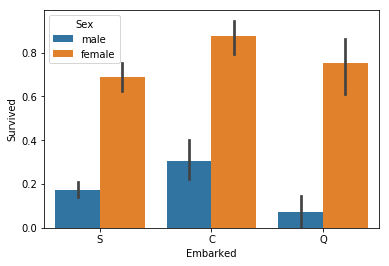

In [5]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=data_train);

c:\users\student\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


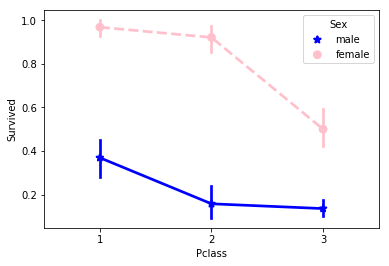

In [6]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex",
    data=data_train, 
    palette={"male": "blue", "female": "pink"},
    markers=["*", "o"], linestyles=["-", "--"]);

Describe what is shown by these graphs.

## 3. Cleanup and Transform the Data

Simplify or remove features using functions. This will avoid overfitting.

Define overfitting in your own words:

I'm grouping people into logical human age groups.

In [7]:
def simplify_ages(df): 
    df.Age = df.Age.fillna(-0.5) 
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120) 
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student',
        'Young Adult', 'Adult', 'Senior'] 
    categories = pd.cut(df.Age, bins, labels=group_names) 
    df.Age = categories 
    return df

Trim the cabins to just have the first letter of the cabin type.

In [8]:
def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.astype(str).str[0] 
    return df

Fare is another continuous value that should be simplified. I ran `data_train.Fare.describe()` to get the distribution of the feature, then placed them into quartile bins accordingly. 

In [9]:
def simplify_fares(df): 
    df.Fare = df.Fare.fillna(-0.5) 
    bins = (-1, 0, 8, 15, 31, 1000) 
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile'] 
    categories = pd.cut(df.Fare, bins, labels=group_names) 
    df.Fare = categories 
    return df

Drop unnecessary columns. You might find a way to repurpose or use these columns in an improvement.

In [10]:
def drop_features(df): 
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

Apply transformations to training and testing dataset

In [11]:
def transform_features(df): 
    df = simplify_ages(df) 
    df = simplify_cabins(df) 
    df = simplify_fares(df) 
    df = drop_features(df) 
    return df

In [12]:
data_train = transform_features(data_train) 
data_test = transform_features(data_test) 
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,male,Student,1,0,1_quartile,N
1,2,1,1,female,Adult,1,0,4_quartile,C
2,3,1,3,female,Young Adult,0,0,1_quartile,N
3,4,1,1,female,Young Adult,1,0,4_quartile,C
4,5,0,3,male,Young Adult,0,0,2_quartile,N


## *Bonus Material

Use this function to quickly visualize any categorical attribute

In [13]:
def visualize_cat(attr, df=data_train):
    df_i = df[['Survived', attr]].groupby([attr])['Survived'].agg(['count','sum', 'mean'])
    m = 'Pct Survived'
    df_i = df_i.rename({'count': 'frequency', 'sum': 'Survivers', 'mean': m}, axis='columns')
    print(df_i)
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    df_i['frequency'].plot.bar(ax=ax1, alpha=.8)
    df_i[m].plot.line(ax=ax2, color='k')
    ax1.set_ylabel('frequency')
    ax2.set_ylabel('Pct Survived')
    ax2.set_ylim(bottom=0, top=1, auto=False)
    ax2.legend()

       frequency  Survivers  Pct Survived
SibSp                                    
0            608        210      0.345395
1            209        112      0.535885
2             28         13      0.464286
3             16          4      0.250000
4             18          3      0.166667
5              5          0      0.000000
8              7          0      0.000000


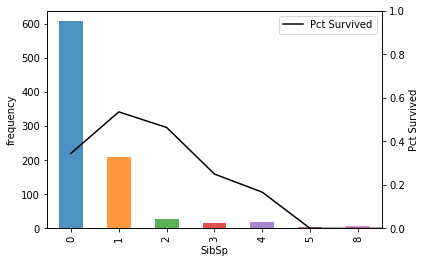

In [14]:
visualize_cat('SibSp')

        frequency  Survivers  Pct Survived
Sex                                       
female        314        233      0.742038
male          577        109      0.188908


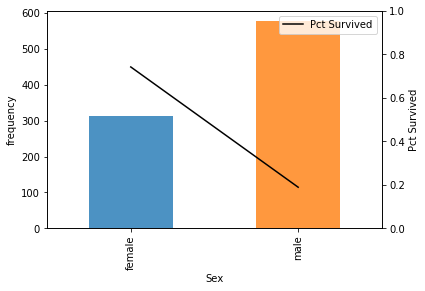

In [15]:
visualize_cat('Sex')

             frequency  Survivers  Pct Survived
Age                                            
Unknown            177         52      0.293785
Baby                44         31      0.704545
Child               25          9      0.360000
Teenager            70         30      0.428571
Student            162         54      0.333333
Young Adult        196         83      0.423469
Adult              195         78      0.400000
Senior              22          5      0.227273


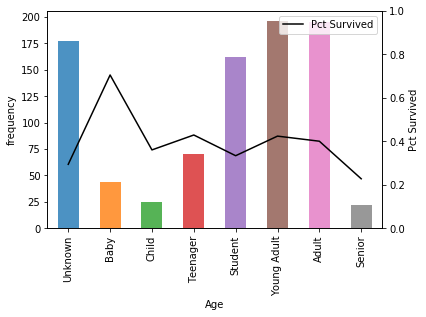

In [16]:
visualize_cat('Age')

## 4. Encode the Data

The last part of the preprocessing phase is to normalize labels. The LabelEncoder in Scikit-learn will convert each unique string value into a number, making out data more flexible for various algorithms.

Consider the limitations of a label encoder and try using a different encoding method in an improvement of this project.
* https://www.datacamp.com/community/tutorials/categorical-data

In [17]:
from sklearn import preprocessing 
def encode_features(df_train, df_test): 
    features = ['Fare', 'Cabin', 'Age', 'Sex'] 
    df_combined = pd.concat([df_train[features], df_test[features]]) 
    for feature in features: 
        le = preprocessing.LabelEncoder() 
        le = le.fit(df_combined[feature]) 
        df_train[feature] = le.transform(df_train[feature]) 
        df_test[feature] = le.transform(df_test[feature]) 
    return df_train, df_test 

In [18]:
data_train, data_test = encode_features(data_train, data_test) 
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,1,4,1,0,0,7
1,2,1,1,0,0,1,0,3,2
2,3,1,3,0,7,0,0,0,7
3,4,1,1,0,7,1,0,3,2
4,5,0,3,1,7,0,0,1,7


## 5. Split Training and Test Sets

* Now its time for some Machine Learning.
* First, separate the features(X) from the labels(y).
* X_all: All features minus the value we want to predict (Survived).
* y_all: Only the value we want to predict.
* Second, use Scikit-learn to randomly shuffle this data into four variables. In this case, I'm training 80% of the data, then testing against the other 20%.

In [19]:
from sklearn.model_selection import train_test_split 

X_all = data_train.drop(['Survived', 'PassengerId'], axis=1) 
y_all = data_train['Survived'] 

num_test = 0.20 

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
    test_size=num_test, random_state=23)

## 6. Use a Decision Tree Model

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Choose the type of classifier. 
clf = DecisionTreeClassifier(criterion='entropy') 

# Fit the algorithm to the data. 
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Test the accuracy of the model on the testing data set

In [42]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8268156424581006


Print feautre importance

In [43]:
fi = clf.feature_importances_
col = X_train.columns
feat_imp = pd.DataFrame(fi, columns=['Importance'],index=col).sort_values(by='Importance', ascending=False)
print(feat_imp)

        Importance
Sex       0.327272
Age       0.190004
Pclass    0.137997
Fare      0.125704
Cabin     0.091422
SibSp     0.079325
Parch     0.048275


## 6a. Use Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# Choose the type of classifier. 
clf1 = LogisticRegression() 

# Fit the algorithm to the data. 
clf1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
predictions = clf1.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7988826815642458


## 6b. Use Random Forest Classifier

In [97]:
from sklearn.ensemble import RandomForestClassifier
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#
clf2 = RandomForestClassifier(bootstrap=False, n_estimators=100, max_features=1, max_depth=10)

# Fit the algorithm to the data. 
clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=10, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [98]:
predictions = clf2.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8379888268156425


## 7. Upload to Kaggle

Now make the predictions on the actual testing dataset from Kaggle

In [99]:
# select model
clf_selected = clf2

In [100]:
ids = data_test['PassengerId'] 
predictions = clf_selected.predict(data_test.drop('PassengerId', axis=1))

In [101]:
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions }) 

In [102]:
output.to_csv('titanic-predictions.csv', index = False) 

In [103]:
output.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


You will find a CSV file in your folder. Upload this file to Kaggle to submit your findings!

##  8. Source

Most of the code and the notations were copied from https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish

## 9. Notes

If you don’t have a package, use pip to install it.
* For example, go to the command line and type this:
`pip install seaborn`